# Project: Investigate a Dataset

## Step One - Choose Your Data Set
For this project, I chose Titanic Data
The data contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this 
[dataset](https://www.kaggle.com/c/titanic/data) on the Kaggle website, where the data was obtained.


## Step Two - Get Organized
For this project, I saved this using my local directory as displayed with my Jupyter notebook. 

## Step Three - Analyze Your Data

To get started, I have a list of 3 questions that should help me understand the data. 
1. What is the breakdown of fares and did it reflect the likelihood of surviving?  
2. What is the breakdown of age and how do we account for those passengers who did have reported data for age? 
3. Was there any 3rd non-intutitive factor that surprised you in regards to survival rate?

---

In [1]:
#needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#import data
filename = '/Users/RichardJamesLopez/Dropbox/RJL_-_Personal/Udacity/Titanic/titanic-data.csv'
df = pd.read_csv(filename, encoding='ascii')


In [3]:
#check colums
print(df.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [4]:
# view data as a Dataframe
pd.DataFrame.head(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Question #1 
Now I can start to approach Question #1 and see if there is anything interesting about the amount each passenger paid for their ticket


In [5]:
#gather desriptive stats about the Fare values
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

The breakdown for quartiles are as follow:
* 1st quartile is for those who paid nothing to 7.91USD,
* 2nd quartile for those who paid between 14.45USD and 7.91USD, 
* 3rd quartile for those who paid between 31USD to 14.45USD, and
* 4th quartile for those who paid between 512.33USD to 31USD. 



In [6]:
# assign quartiles 
quartiles = pd.qcut(df['Fare'],q=4,labels=["4th Quartile","3rd Quartile","2nd Quartile","1st Quartile"])
quartiles.describe()

count              891
unique               4
top       3rd Quartile
freq               224
Name: Fare, dtype: object

The largest quartile is the 3rd which had 224 people out of the 891 in the sample size

In [7]:
# Use mean to assign likelihood of surving based on fare paid for ticket 
df.groupby(quartiles).mean()['Survived']

Fare
1st Quartile    0.581081
2nd Quartile    0.454955
3rd Quartile    0.303571
4th Quartile    0.197309
Name: Survived, dtype: float64

Based on the analysis above, 
patrons who paid more than ***31USD*** at the time of the Titanic (1st Quartile) had a better than half chance of survive based on the sample. 
Patrons who paid less than ***7.91USD*** (4th Quartile) had a less than 5th chance surviving. 

---


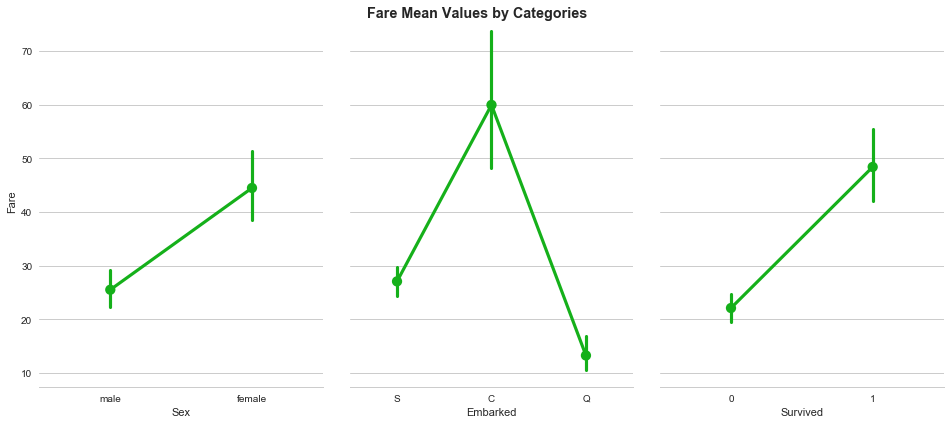

In [8]:
sns.set(style="whitegrid")

# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(df, y_vars="Fare",
                 x_vars=["Sex","Embarked","Survived"],
                 size=6, aspect=0.75)

# Draw a seaborn pointplot onto each  Axes
g.map(sns.pointplot, color=sns.xkcd_rgb["green"])
g.fig.suptitle('Fare Mean Values by Categories', weight="bold")
sns.despine(fig=g.fig, left=True)
plt.show(g)

Based on the visualization above, I can also observe that the average fares based on the sex, embarkment location, and suvival of the passengers. 

Note: 
* S stands for Southampton , C for Cherbourg and Q for Queenstown
* In the Survival plot, 0 indicates that passenger did not survive and the 1 that they did
* The vertical lines represent the error bars at a confidence interval at 95%


This visualization gives an indication as to what general relationships exist between these binary (or categorical) variables that don't require many bins. Based on a basic plot, I gather the following: 
* female passengers had tickets with higher fares on average
* the embarkment locations for each ticket affected the fares with Cherbourg having the most expensive tickets and Queenstown the cheapest
* the average fare for those who suvived was approximately $25 more than those who didn't survive 


---

### Question #2
Now I can start to approach Question #2 and see if there is anything interesting about the age of passengers

In [9]:
# Count of those that survived
survived = df.loc[df['Survived'] == 1]
survived['Survived'].describe()

count    342.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Survived, dtype: float64

In [10]:
# Count of those that didn't survive
no_survived = df.loc[df['Survived'] == 0]
no_survived['Survived'].describe()

count    549.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Survived, dtype: float64

In [11]:
#First find out how many passengers do not have reported data for age
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There appear to be 177 rows with no value for Age of Passengers

In [12]:
# Albeit not a perfect remedy, remove the NaN from the Column 'Age' 
df_cleaned = df.Age.dropna()


In [13]:
#Double check of newly altered df
df_cleaned.count()

714

In [14]:
# Separate the group into Survived and not_Survived (after having removed the null values)
survived = df.loc[df['Survived'] == 1]
not_survived = df.loc[df['Survived'] == 0]

In [15]:
# The folowing is the sample of values for thiose passengers that survived
survived.Survived.count()
survived.Age.describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

The information above showcases the following about those who survived and we know their age (within this sample):
* the mean age was approximate 28 year and 4 moths
* the oldest person who survived was 80, the youngest was a couple months old
* the stand deviation was close to about 15 years old

In [16]:
#The folowing is the sample of values for thiose passengers that didn't survived
not_survived.Survived.count()
not_survived.Age.describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

The information above showcases the following about those who didn't survived and we know their age (within this sample):
* the mean age was approximate 30 year and 6 moths
* the oldest person who survived was 74, the youngest was 1 year old
* the stand deviation was a little more than 14 years old


When looking at the age of this sample, the descriptive statistics highlight a couple of interesting facts about this data set
* Those who survived were a little younger, although the distribution of values was spread wider
* When we removed the rows for those passengers for those age we didn't know the percentage of survival went to 40.62% (290/714) whereas it was originally 38.38% (342/891)
* At first glance, there appears to be less of a difference between the ages of those who survived vs those who didn't based on my initial suspicion




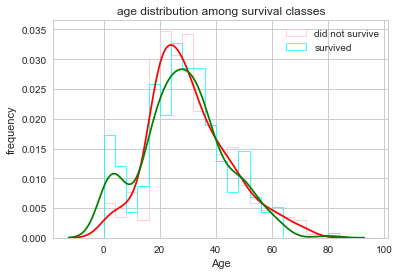

In [17]:
age_bins = np.arange(0, 100, 4)
sns.distplot(df.loc[(df['Survived']==0) & (~df['Age'].isnull()),'Age'], bins=age_bins, hist=True, color="red", hist_kws={"histtype": "step", "linewidth": 1, "alpha": 0.75, "color": "pink"})
sns.distplot(df.loc[(df['Survived']==1) & (~df['Age'].isnull()),'Age'], bins=age_bins, hist=True, color="green", hist_kws={"histtype": "step", "linewidth": 1, "alpha": 0.75, "color": "cyan"})
plt.title('age distribution among survival classes')
plt.ylabel('frequency')
plt.legend(['did not survive', 'survived']);
plt.show()

Above is a plot displaying the trend lines for the distribution of passenging by age and whether they survived or not.

It corroborates and visualizes an earlier cited facts: 
* the mean age for the those who survived is at approximately 30 years old and approximately a couple year earlier for those who did not survive

It also visualizes a face that was not clear from the descriptive statistics presented earlier:
* the frequency for younger passengers (age 0-5) had a visisbly higher rate of surviving than those who did not, make clear by bothe the trend lines and the histographs values outlined in red and green


---


### Question #3
Now I can start to approach Question #3 and see if there is any 3rd non-intutitive factor that surprised you in regards to survival rate?

To begin, I looked at one of the non-linear and non-binary factors - the column 'Embarked'. It represents the port of embarkation and there is no initial reason to believe that any of the port should change the composition of its passengers.

To observe this data, I created a table using a crosstab

In [18]:
ct = pd.crosstab(df['Embarked'], df['Survived'])
ct['Total'] = ct.sum(1) # sum across columns
ct

Survived,0,1,Total
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644


Interpreting the table above, I observe that in this sample:  

* 217 out of 644 passengers that embarked on Southampton survived. 
* 30 out of 77 passengers that embarked on Queenstown  survived. 
* 93 out of 168 passengers that embarked on Cherbourg survived. 


---

In [19]:
168 + 77 + 644 

889

I was also curious about people didn't pay any fare. 

In [20]:
# count who did not pay fare
no_fare = df[df.Fare == 0]
no_fare.Fare.count()

15

In [21]:
#create a table of these 15 people
no_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


Based on the table above, the 15 passengers that did not pay a fare, 
* all came from Southampton
* all were male
* only one of the survived

---

In [22]:
# See how many people paid the price of the highest Fare
highest_fare = df[(df.Fare == 512.329200)]
highest_fare.Fare.count()

3

In [23]:
# See how many people paid the price of the highest Fare and survived
highest_fare_survived = df[(df.Survived == 1) & (df.Fare == 512.329200)]
highest_fare_survived.Fare.count()

3

Albeit a crude analysis with a very small sample, all three of the passenger who paid the most for a fare, also survived. 

However, there was also at least one passenger who paid nothing for a fare and also survived

---

## Step Four - Share Your Findings
I created this following report that shares the findings you found most interesting. I chose to use Jupyter notebook to share your findings alongside the code used to perform the analysis.

### Conclusion


***_Are there any missing observations in the data - i.e., other passengers that are not in our data set?_***
There are many missing observations in the data. As the data overview reports, there were a total of 2224 passenger and crew on the Titanic that would create the data population. However, for this sample we have a total of 891 observations


***___Are there any missing features in the data - i.e., information that could help you in your analysis, but that is not available in this data set?___***

The fields provided were helpful, several were incomplete. 

For example, an analysis for the fields "Cabin" and "Ticket" could be warrented. However, with many null values as well as the multiple values for individual rows in the field "Cabin", I hesistate to analyse this relationship due to the dearth of data. 

Another example was trying to discern a relationship between the "PClass" fields and the "Ticket" price field. Even after normalizing the ticket price based on location of embarkment, there is no consistent ticket prices for any one Passenger class. This causes the data about those passengers with higher socio-economic status ambigious as a result 

***___Are there any missing values in the data - i.e., are there variables for which some values are missing? (You know the answer to this one as well.)___***

As I approached the data I noticed that there needed to be some data cleaning as certain fields had a host of missing values that would be important to this analysis. For this reason, I removed all null values as it pertained to passengers without a reported age. Hence, the df_cleaned variable was created as a result to answer Question #2. 

However, there may have been null values for other fields like "Fare" and it stands to reason that a similar cleaning of the data exercise is applicable. Given though that the field had values of 0, and there can be fares of that amount, it was not safe to assume to remove those values even though they very well could have been null. As a result,  for Question #1 I ran all data points and did not feel the need to clean any values. 

Finally, there the analysis for for the "Embarkment" field that was largely present. Of the 891 observations the data set provided, there was 889 values present for this field. For Question #3 though, there was no need to clean the data as running subset variable for "Embarkment" automatically did not count the null values and allowed a fairly quick and easy analysis. 

***___What kind of statistical tests could be performed to verify if the conclusions drawn from this initial data exploration are true? Would these tests be definitive in their conclusions?___***

Based on my conclusions for each of the questions above, I suppose some of the observations could have strengthened by further statistical testing. 

For example, for the "Embarkment" field, I suppose an additional set of tests involving the Chi Squared values could see if there is any explanatory power to the different port cities. 


In another example, I could have expanded my groupby views of the data set and see if there any set of variables that are more relevant than others using Multiple Regressions. 
Multiple Regessions

Finally, it stands to reason that when I compare means of fields that an ANOVA table would be prudent so as to account for variances. 



## Step Five - Review
Based on this project, I have submitted it 2 time(s). 